# Big Data Mart Sales 

# Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv("bigdatamart_Train.csv")

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA

So,I can see this is Regression problem.

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Checking For Datasets

In [7]:
df.shape

(8523, 12)

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

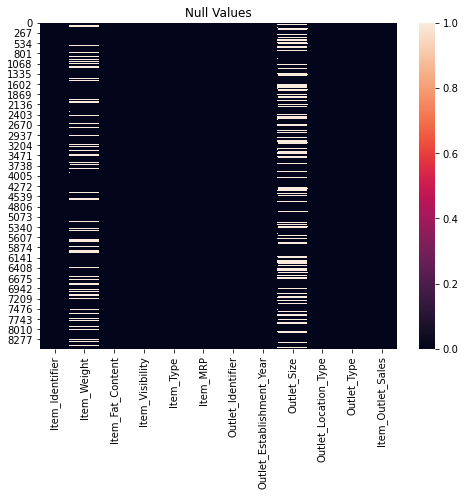

In [13]:
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We can see there are null values in two columns.

In [14]:
df.loc[df['Item_Outlet_Sales'] == " "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


We can see there are no empty observations in target column.

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Univariate Analysis

# Item_Weight:

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

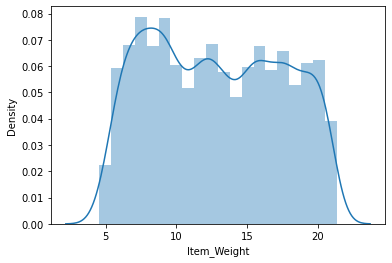

In [16]:
sns.distplot(df['Item_Weight'])

# Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

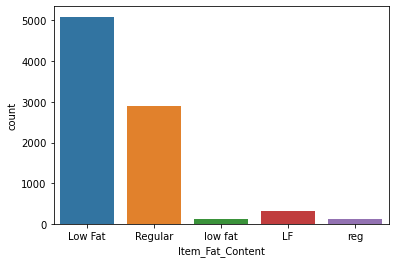

In [17]:
sns.countplot(df['Item_Fat_Content']);
df.Item_Fat_Content.value_counts()

# Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

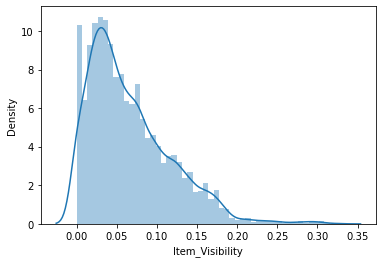

In [18]:
sns.distplot(df['Item_Visibility'])

# Item_Type

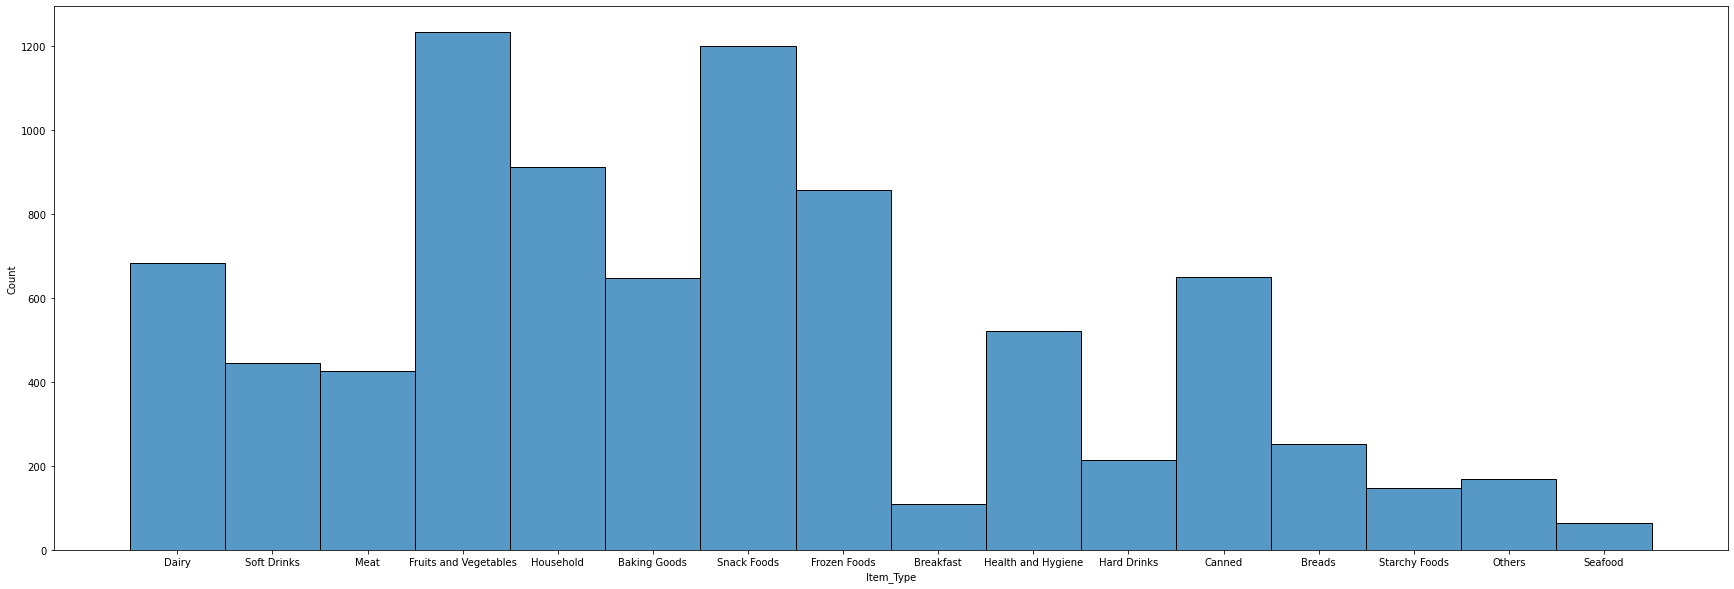

In [19]:
plt.figure(figsize=(30,10))
sns.histplot(df['Item_Type'])
plt.show()

# Item_Mrp

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

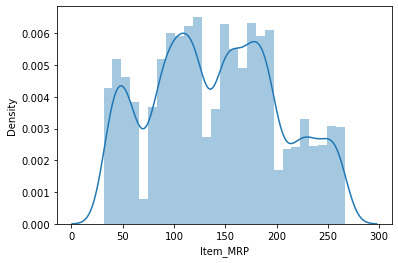

In [20]:
sns.distplot(df['Item_MRP'])

# Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Count'>

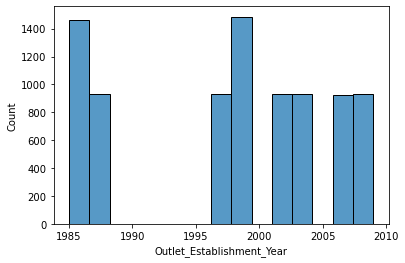

In [21]:
sns.histplot(df['Outlet_Establishment_Year'])

# Outlet_Size

In [22]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
labels = ["Medium","Small","High"]

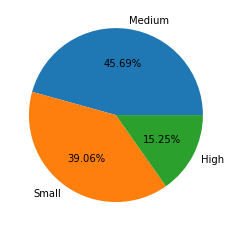

In [24]:
labels='Medium','Small','High'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Size'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.show()

# Outlet_Location_Type

In [25]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [26]:
labels = ['Tier 3','Tier 2','Tier 1']

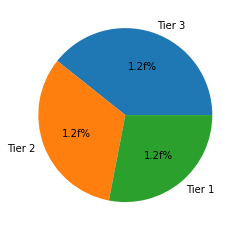

In [27]:
labes='Tier 3','Tier 2','Tier 1'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Location_Type'].value_counts(), labels=labels, autopct='1.2f%%')
plt.show()

# Outlet_Type

In [28]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [29]:
labels = ['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2']

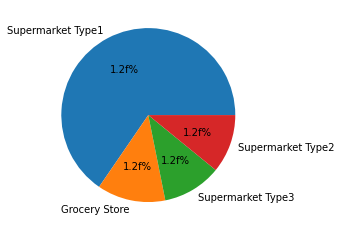

In [30]:
labels='Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'
fig, ax = plt.subplots()
ax.pie(df['Outlet_Type'].value_counts(), labels=labels, autopct='1.2f%%')
plt.show()

# Item_Outlet_Sales

In [31]:
df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1230.3984    14
             ..
1883.5482     1
5386.9878     1
4231.8248     1
91.2146       1
3653.9104     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

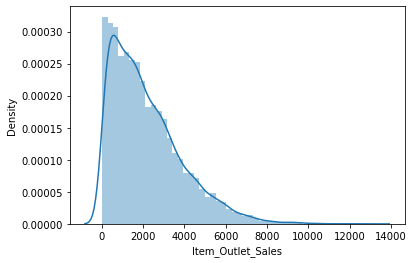

In [32]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

# Bivariate Analysis

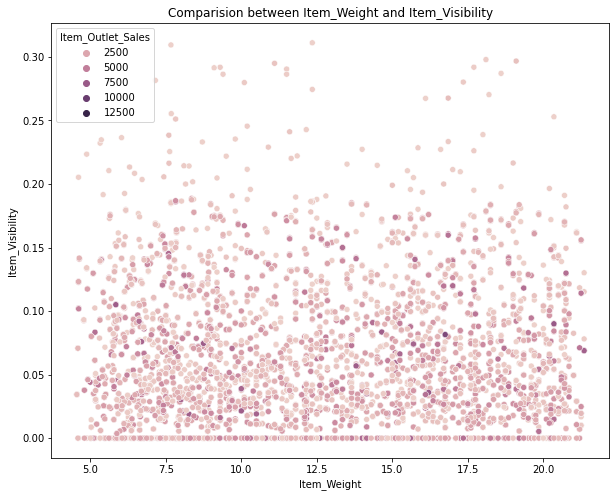

In [33]:
plt.figure(figsize=[10,8])
plt.title('Comparision between Item_Weight and Item_Visibility')
sns.scatterplot(df['Item_Weight'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"]);

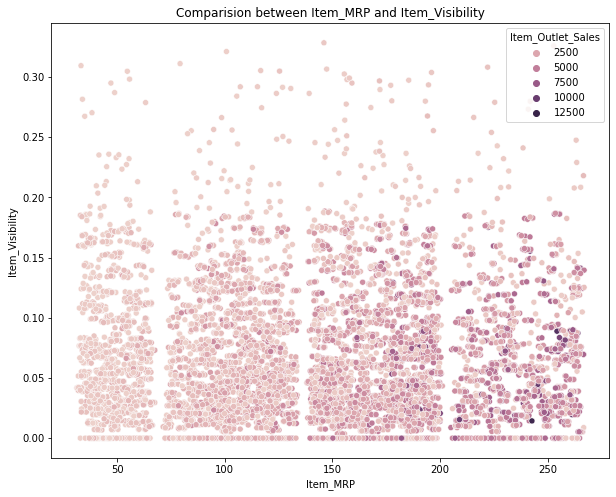

In [34]:
plt.figure(figsize=[10,8])
plt.title('Comparision between Item_MRP and Item_Visibility')
sns.scatterplot(df['Item_MRP'],df['Item_Visibility'],hue=df["Item_Outlet_Sales"]);

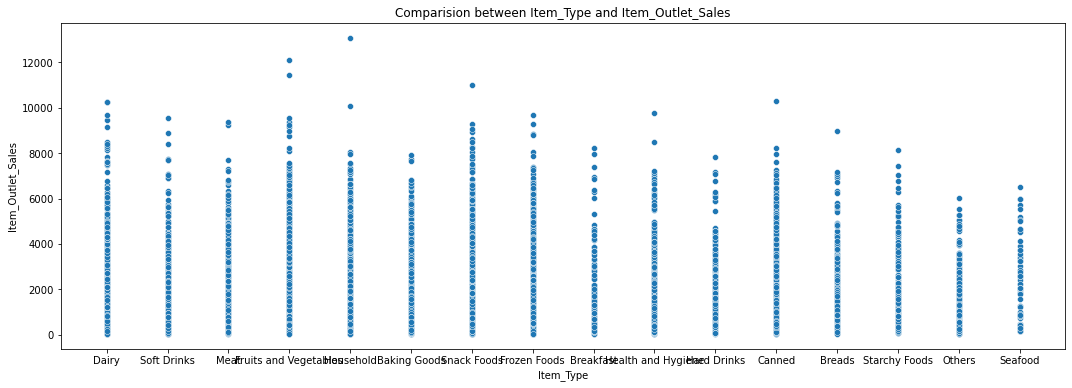

In [35]:
plt.figure(figsize=[18,6])
plt.title('Comparision between Item_Type and Item_Outlet_Sales')
sns.scatterplot(df['Item_Type'],df['Item_Outlet_Sales']);

# Multivariate Analysis

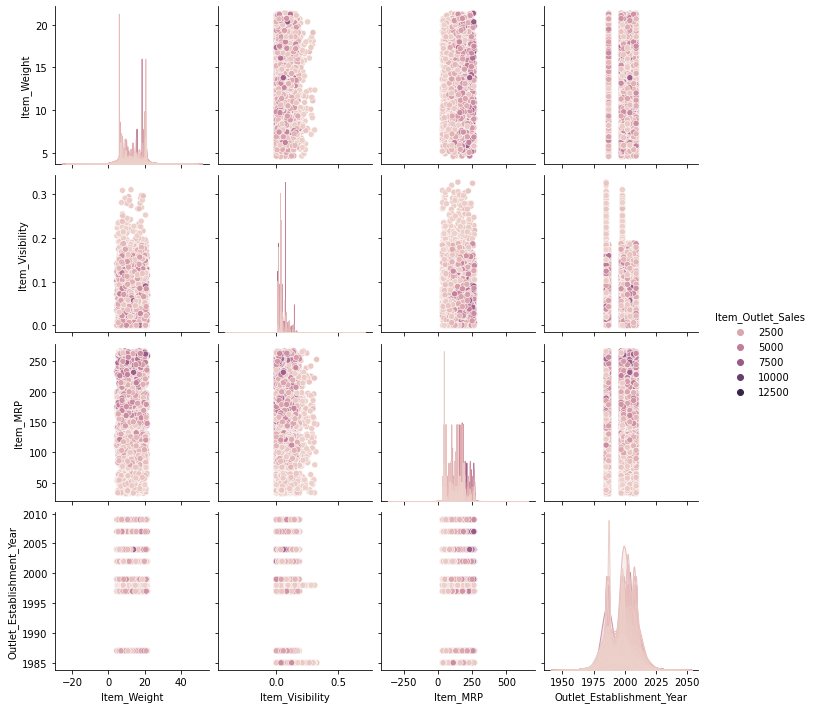

In [36]:
sns.pairplot(df,hue="Item_Outlet_Sales")

# Data Cleaning

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here i can see there are null values in Item_Weight and Outlet_Size

# Treating missing values

In [41]:
#Treating  null values in Item_Weight column using mean
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [42]:
#Treating null values in Outlet_Size column using mode=Medium
df["Outlet_Size"]=df["Outlet_Size"].fillna(value='Medium')

In [43]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So,I have removed the null values.

# Checking Skewness

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

# Removing Skewness 

In [52]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [53]:
df_new[['Item_Visibility']] = scaler.fit_transform(df_new[['Item_Visibility']].values)

In [54]:
df_new.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

# Checking for Outliers

<AxesSubplot:>

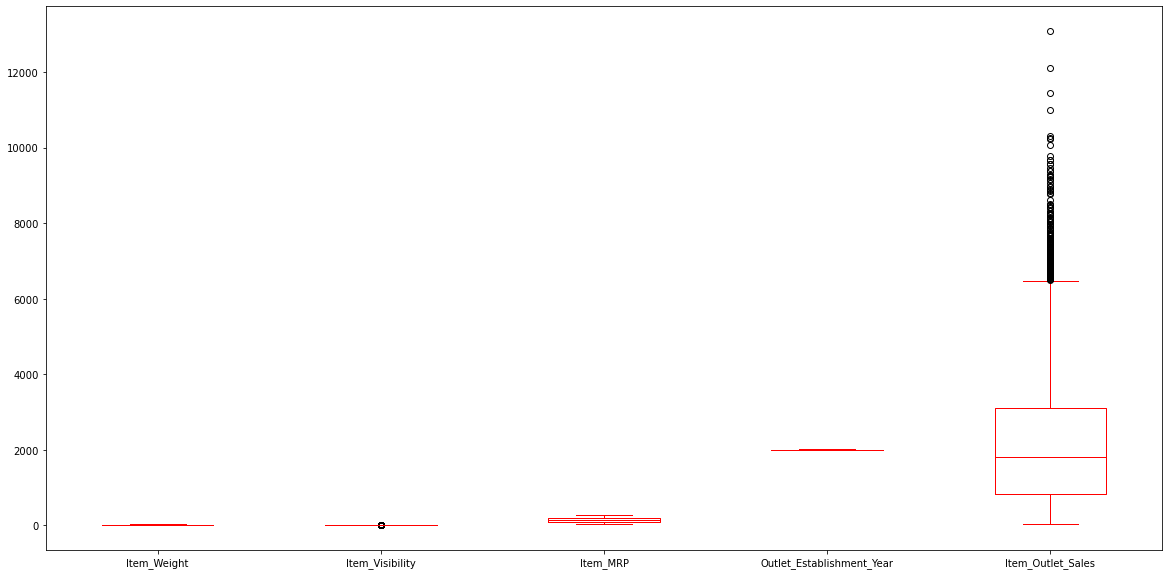

In [65]:
df.plot(kind='box',fontsize=10,figsize=(20,10),color='r')

In Item_Visbility and Item_Outlet_Sales can see Outliers

# Removing outliers

# Zscore method

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df[["Item_Visibility"]]))
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [48]:
df_new.shape

(8428, 12)

In [49]:
df.shape

(8523, 12)

So, I can see there is difference in between new data set and old data set.

In [50]:
Dataloss=(((8523-8428)/8523)*100)

In [51]:
Dataloss

1.1146309984747156

I can see there is a dataloss of 1% in outliers

# Label Encoding

In [55]:
df_new.skew()

Item_Weight                  0.089907
Item_Visibility              0.115444
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_new[column] = label_encoders[column].fit_transform(df_new[column])

In [57]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,-1.142270,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,-1.032913,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,-1.117874,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,-1.734798,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,-1.734798,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.033409,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,-0.212619,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,-0.537754,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,1.538309,13,103.1332,3,2009,1,2,2,1845.5976


# Saving the file in joblib

In [72]:
joblib.dump(df,"df_joblib.pkl")

['df_joblib.pkl']

# Load model from file

In [73]:
classifier = joblib.load('df_joblib.pkl')